In [3]:

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
coco = COCO("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/instances_train2017.json")

loading annotations into memory...
Done (t=0.99s)
creating index...
index created!


In [3]:
roidb = coco.loadImgs(coco.getImgIds())
roi = roidb[1]

In [5]:
roi = [roi for roi in roidb if roi["coco_url"] == "http://images.cocodataset.org/val2017/000000000139.jpg"][0]

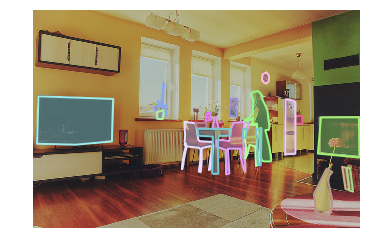

In [6]:
I = io.imread(roi['coco_url'])
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=roi['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
len(anns)

20

In [60]:
def visualize(coco, roi, filename):
    I = io.imread(roi['coco_url'])
    # Create a Rectangle patch
    fig,ax = plt.subplots(1, figsize=(15,15))
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=roi['id'])
    anns = coco.loadAnns(annIds)

    for ann in anns:
        x, y, w, h = ann['bbox']
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none' )
        ax.add_patch(rect)
        ax.annotate(coco.cats[ann["category_id"]]["name"], (x+w/2,y))
    plt.savefig("images/gt_visualization/" + filename, bbox_inches='tight', pad_inches=0, transparent=True)

In [61]:
coco_coco = COCO("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/instances_val2017.json")
roidb_coco = coco.loadImgs(coco.getImgIds())
roi_coco = [roi for roi in roidb if roi["coco_url"] == "http://images.cocodataset.org/val2017/000000000139.jpg"][0]

loading annotations into memory...
Done (t=0.85s)
creating index...
index created!


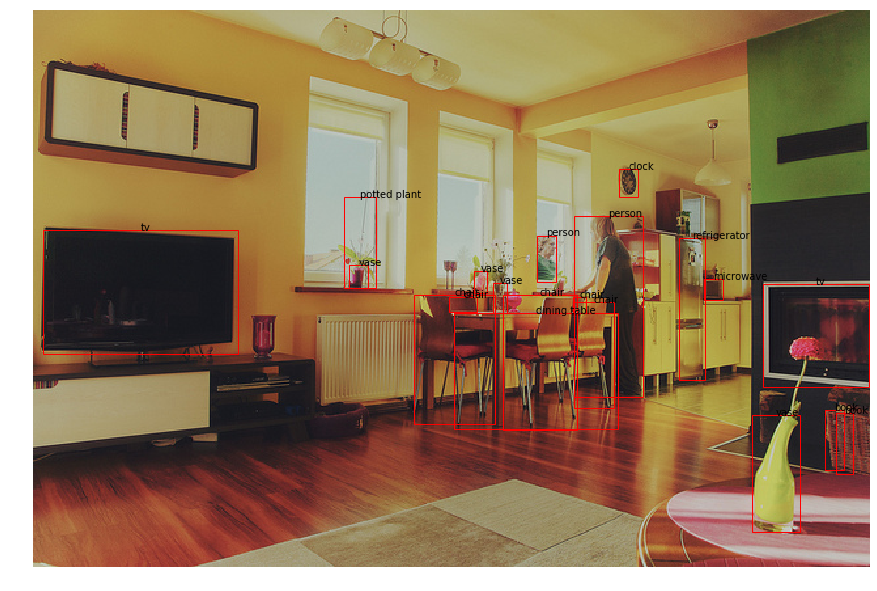

In [62]:
visualize(coco_coco, roi, "coco_"+str(roi['id']))

In [63]:
coco = COCO("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/parts/annotations/0_val.json")
roidb = coco.loadImgs(coco.getImgIds())
roi = [roi for roi in roidb if roi["coco_url"] == "http://images.cocodataset.org/val2017/000000000139.jpg"][0]

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


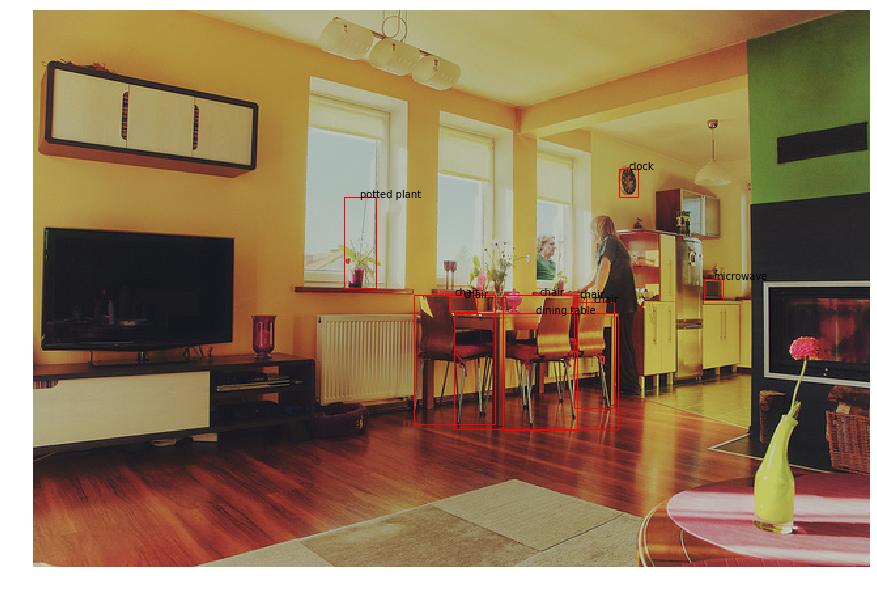

In [64]:
visualize(coco, roi, "coco_part_0"+str(roi['id']))